In [126]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

from matplotlib import font_manager, rc
%matplotlib inline
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "C:/Windows/Fonts/NanumBarunGothic.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

import nltk
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action='ignore')

In [88]:
import konlpy
from konlpy.tag import Okt

In [91]:
df = pd.read_csv('../data/train_test.csv')

# 분석2 - FASTTEXT
* Okt 형태소 분석기 사용
* FASTTEXT로 워드 임베딩 후 tsne로 긍/부정 리뷰의 토큰을 시각화
* tsne 코드 출처 : https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [92]:
# 불용어 설정
stopwords = ['요', '안', '로', '때', '것', '의','을','를', '가', '이', 
             '은', '들', '는', '좀', '잘','그냥', '걍', '과', '도', '를', 
             '으로', '자', '에', '와', '한', '하다', '있다', '수', '더', '못', 
             '만', '적', '.', ',', '냐', '네', 'ㅠㅠ', 'ㅋ', 'ㅎㅎ', 'ㅜ', 
             'ㅠ', '개']

In [94]:
okt = Okt()

# cp_0 : 부정 리뷰 토큰 / cp_1 : 긍정 리뷰의 토큰
cp_0 = []
for sentence in df[df['sentiment'] == 0].document:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]# 불용어 제거
    cp_0.append(temp_X)
    
cp_1 = []
for sentence in df[df['sentiment'] == 1].document:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]# 불용어 제거
    cp_1.append(temp_X)

In [132]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
 
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=2, n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    plt.rc('font', family='NanumGothic')
 
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(6, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

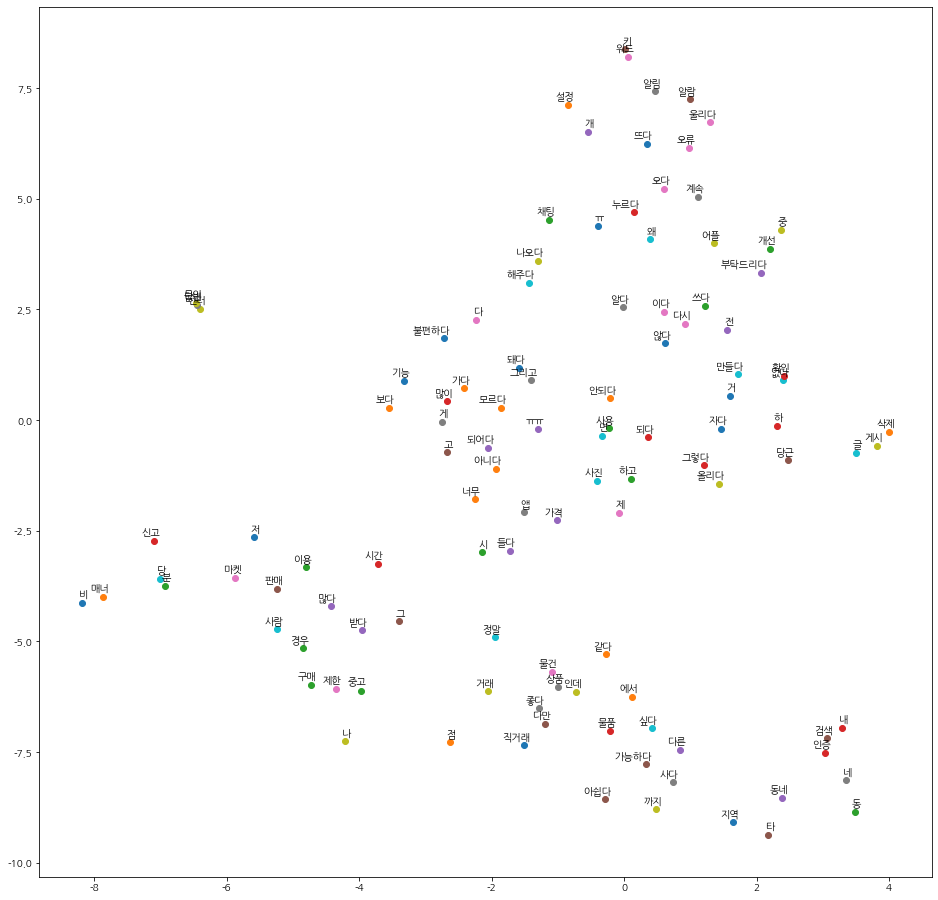

In [169]:
model0 = FastText(cp_0, size=3, window=4, min_count=25, workers=4, iter=1000, seed=0)
tsne_plot(model0)

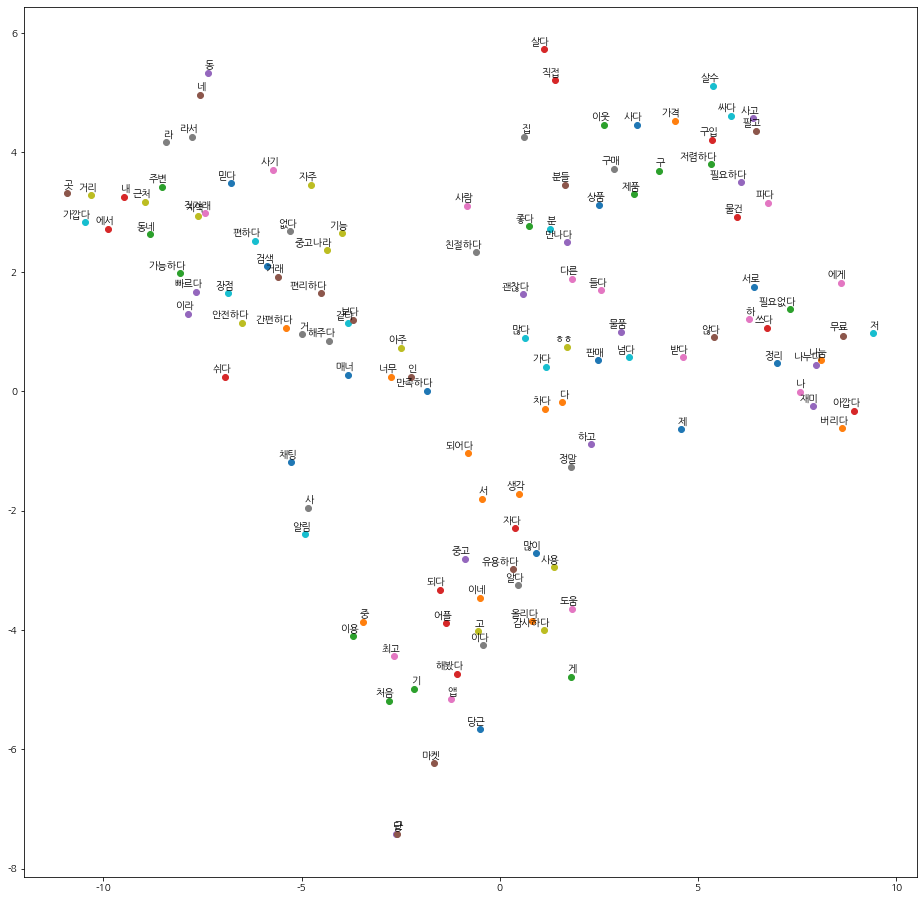

In [163]:
model0 = FastText(cp_1, size=3, window=4, min_count=25, workers=4, iter=1000, seed=0)
tsne_plot(model0)